In [41]:
import pandas as pd
data = pd.read_csv('./housing.csv')
data.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [42]:
data.describe()
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [43]:
data.dropna(subset=['total_bedrooms'], inplace=True)
data.isnull().sum()



longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [44]:
data['ocean_proximity'].value_counts()  


ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

In [45]:
data = pd.get_dummies(data, columns=['ocean_proximity'], prefix='ocean')

In [46]:
data = data.rename(columns={'ocean_<1H OCEAN': '<1H'})
data = data.rename(columns={'ocean_NEAR BAY': 'NEAR_BAY'})
data = data.rename(columns={'ocean_ISLAND': 'ISLAND'})
data = data.rename(columns={'ocean_INLAND': 'INLAND'})
data = data.rename(columns={'ocean_NEAR OCEAN': 'NEAR_OCEAN'})
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H,INLAND,ISLAND,NEAR_BAY,NEAR_OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,False,True,False,False,False
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,False,True,False,False,False
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,False,True,False,False,False
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,False,True,False,False,False


In [50]:
data = data.astype(int)
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H,INLAND,ISLAND,NEAR_BAY,NEAR_OCEAN
0,-122,37,41,880,129,322,126,8,452600,0,0,0,1,0
1,-122,37,21,7099,1106,2401,1138,8,358500,0,0,0,1,0
2,-122,37,52,1467,190,496,177,7,352100,0,0,0,1,0
3,-122,37,52,1274,235,558,219,5,341300,0,0,0,1,0
4,-122,37,52,1627,280,565,259,3,342200,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121,39,25,1665,374,845,330,1,78100,0,1,0,0,0
20636,-121,39,18,697,150,356,114,2,77100,0,1,0,0,0
20637,-121,39,17,2254,485,1007,433,1,92300,0,1,0,0,0
20638,-121,39,18,1860,409,741,349,1,84700,0,1,0,0,0


In [48]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H,INLAND,ISLAND,NEAR_BAY,NEAR_OCEAN
0,-122,37,41,880,129,322,126,8,452600,0,0,0,1,0
1,-122,37,21,7099,1106,2401,1138,8,358500,0,0,0,1,0
2,-122,37,52,1467,190,496,177,7,352100,0,0,0,1,0
3,-122,37,52,1274,235,558,219,5,341300,0,0,0,1,0
4,-122,37,52,1627,280,565,259,3,342200,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121,39,25,1665,374,845,330,1,78100,0,1,0,0,0
20636,-121,39,18,697,150,356,114,2,77100,0,1,0,0,0
20637,-121,39,17,2254,485,1007,433,1,92300,0,1,0,0,0
20638,-121,39,18,1860,409,741,349,1,84700,0,1,0,0,0


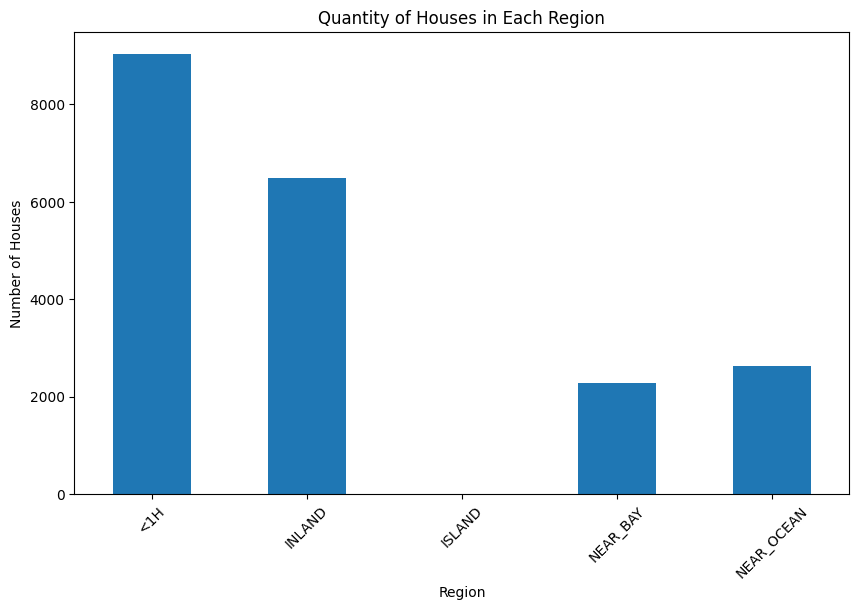

In [56]:
import matplotlib.pyplot as plt



region_counts = data[['<1H','INLAND','ISLAND','NEAR_BAY','NEAR_OCEAN']].sum()

plt.figure(figsize=(10, 6))
region_counts.plot(kind="bar")
plt.xlabel("Region")
plt.ylabel("Number of Houses")
plt.title("Quantity of Houses in Each Region")
plt.xticks(rotation=45)
plt.show()

<Figure size 1000x600 with 0 Axes>

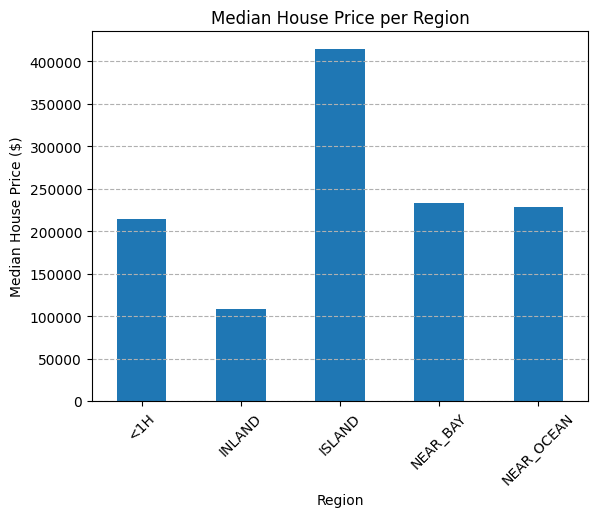

In [73]:
region_columns = ['<1H', 'INLAND', 'ISLAND', 'NEAR_BAY', 'NEAR_OCEAN']

median_prices = {
    region: data.loc[data[region] == 1, 'median_house_value'].median()
    for region in region_columns
}

median_prices_df = pd.DataFrame.from_dict(median_prices, orient='index', columns=['Median House Price'])

plt.figure(figsize=(10, 6))
median_prices_df.plot(kind="bar", legend=False)
plt.xlabel("Region")
plt.ylabel("Median House Price ($)")
plt.title("Median House Price per Region")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=1)
plt.show()

In [ ]:
data 